## Loading files

In [3]:
# Install libraries
if (!require("BiocManager")) install.packages("BiocManager")
if(!require("DiffBind"))BiocManager::install("DiffBind")
if(!require("tidyverse")) install.packages("tidyverse")
if(!require("edgeR")) BiocManager::install("edgeR")
if(!require("DESeq2")) BiocManager::install("DESeq2")
if(!require("csaw")) BiocManager::install("csaw")
if(!require("ChIPpeakAnno")) BiocManager::install("ChIPpeakAnno")
if(!require("profileplyr")) BiocManager::install("profileplyr")
if(!require("TxDb.Mmusculus.UCSC.mm39.knownGene")) BiocManager::install("TxDb.Mmusculus.UCSC.mm39.knownGene")
if(!require("org.Mm.eg.db")) BiocManager::install("org.Mm.eg.db")
if(!require("magick")) install.packages("magick")
if(!require("reactome.db")) BiocManager::install("reactome.db")
if(!require("clusterProfiler")) BiocManager::install("clusterProfiler")
if(!require("enrichplot")) BiocManager::install("enrichplot")
if (!require("openxlsx")) install.packages("openxlsx")

Loading required package: BiocManager

Bioconductor version '3.17' is out-of-date; the current release version '3.18'
  is available with R version '4.3'; see https://bioconductor.org/install

Loading required package: DiffBind

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The f

In [21]:
# Read data
sample_sheet <- read.delim("/scratch/lmaas/mda5_project/atac_seq_data/sample_sheets/diffbind_seq2science_no_length_filter_downsampled.tsv", sep="\t")
sample_sheet

SampleID,Tissue,Treatment,Condition,Replicate,bamReads,Peaks,PeakCaller
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
WT0h_1,WT,0h,WT_0h,1,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43340_WT0h_1_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43340_WT0h_1_ATAC_peaks.narrowPeak,narrow
WT0h_2,WT,0h,WT_0h,2,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43169_WT0h_2_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43169_WT0h_2_ATAC_peaks.narrowPeak,narrow
WT24h_1,WT,24h,WT_24h,1,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43170_WT24h_1_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43170_WT24h_1_ATAC_peaks.narrowPeak,narrow
WT24h_2,WT,24h,WT_24h,2,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43171_WT24h_2_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43171_WT24h_2_ATAC_peaks.narrowPeak,narrow
WT48h_1,WT,48h,WT_48h,1,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43344_WT48h_1_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43344_WT48h_1_ATAC_peaks.narrowPeak,narrow
OE0h_1,OE,0h,OE_0h,1,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43172_OE0h_1_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43172_OE0h_1_ATAC_peaks.narrowPeak,narrow
OE0h_2,OE,0h,OE_0h,2,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43346_OE0h_2_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43346_OE0h_2_ATAC_peaks.narrowPeak,narrow
OE24h_1,OE,24h,OE_24h,1,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43173_OE24h_1_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43173_OE24h_1_ATAC_peaks.narrowPeak,narrow
OE24h_2,OE,24h,OE_24h,2,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/final_bam/GRCm39-43174_OE24h_2_ATAC.samtools-coordinate.bam,/scratch/lmaas/mda5_project/seq2science_no_length_filter_downsampled/macs2/GRCm39-43174_OE24h_2_ATAC_peaks.narrowPeak,narrow


In [24]:
# Preprocess data

# Load the data into a Diffbind object
DBdata <- dba(sampleSheet=sample_sheet)
# Determine peak counts
DBdata <- dba.count(DBdata)
# Comparisons should be made based on DBA_CONDITION (In the diffbind tsv loaded above)
DBdata <- dba.contrast(DBdata, categories=DBA_CONDITION, minMembers=2)

Computing summits...

Re-centering peaks...

Computing results names...



## QC plots

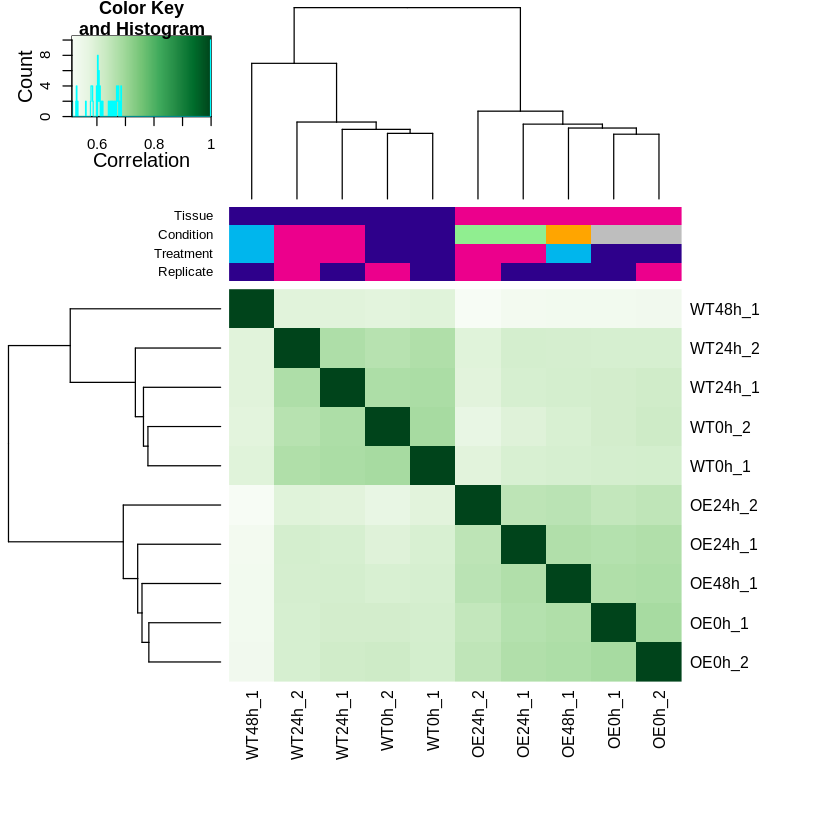

In [25]:
# Plot heatmap
plot(DBdata)
# Plot PCA
dba.plotPCA(DBdata, attributes=DBA_CONDITION, label=DBA_ID)

[1] 141012 141012 115522  99243  86206  74463  63830  52866  41515  28491

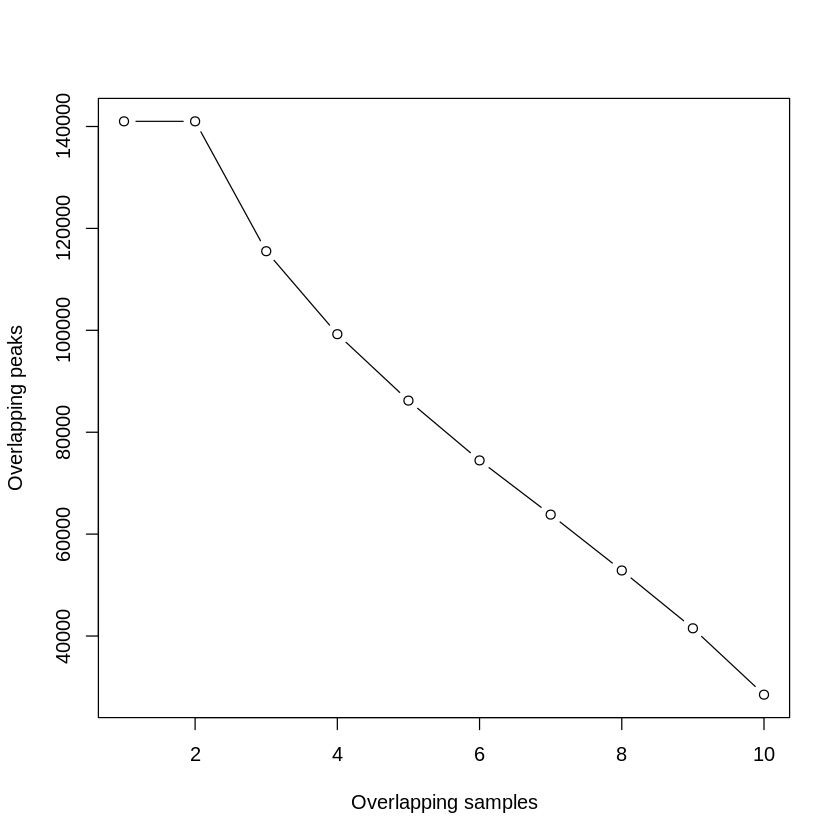

In [6]:
# Overlap in peaks found in multiple filess
olap.rate <- dba.overlap(DBdata, mode=DBA_OLAP_RATE)
olap.rate
plot(olap.rate, xlab="Overlapping samples", ylab="Overlapping peaks", type="b")

## Differential expression analysis

In [26]:
# normalize and perform all possible pairwise comparisons
DBdata <- dba.normalize(DBdata, library=DBA_LIBSIZE_FULL, offsets=FALSE)
DBdata1 <- dba.analyze(DBdata, method=DBA_DESEQ2, bBlacklist=FALSE, bGreylist=FALSE)

# Also tried using RLE normalization
# DBdata <- dba.normalize(DBdata, library=DBA_LIBSIZE_FULL, normalize=DBA_NORM_RLE)
# DBdata2 <- dba.analyze(DBdata, method=DBA_DESEQ2, bBlacklist=FALSE, bGreylist=FALSE)

# Also tried using PEAKREADS
DBdata <- dba.normalize(DBdata, library=DBA_LIBSIZE_PEAKREADS)
DBdata3 <- dba.analyze(DBdata, method=DBA_DESEQ2, bBlacklist=FALSE, bGreylist=FALSE)

# Also tried using EDGER differential analysis instead of DESEQ2
DBdata <- dba.normalize(DBdata, library=DBA_LIBSIZE_FULL , normalize=DBA_NORM_RLE)
DBdata4 <- dba.analyze(DBdata, method=DBA_EDGER, bBlacklist=FALSE, bGreylist=FALSE)

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [27]:
#create report of all contrasts
reportx <- dba.report(DBdata1, contrast=c(1,2,3,4,5,6), bDB=TRUE, th=0.05)

# Get all differential peaks in all contrasts
diff_peaks <- c()
for (i in 1:length(reportx$peaks)) {
    diff_peaks <- c(diff_peaks, row.names(reportx$peaks[[i]]))
}
# Only keep unique ones
diff_peaks <- unique(as.numeric(diff_peaks))

# Make a vector of FALSE with the length of the total amount of peaks
peaks_to_use <- rep(FALSE, length(dba.peakset(DBdata1, bRetrieve=TRUE)))
# Set differential peaks to TRUE
peaks_to_use[diff_peaks] <- TRUE


#dba.plotPCA(DBdata1, label=DBA_ID, attributes=DBA_CONDITION)
#dba.plotPCA(DBdata1, label=DBA_ID, attributes=DBA_CONDITION, contrast=2, mask=DBdata1$masks$All)

# Create a heatmap and PCA using only the differential peaks
dba.plotPCA(DBdata, sites=peaks_to_use, label=DBA_ID, attributes=DBA_CONDITION)
dba.plotHeatmap(DBdata, sites=peaks_to_use)

Generating report-based DBA object...



## Venn diagram and cluster heatmap

Generating report-based DBA object...



4 Samples, 1887 sites in matrix:
           Contrast Direction DB Method Intervals
1   OE_0h vs. WT_0h      Gain DB DESeq2       463
2   OE_0h vs. WT_0h      Loss DB DESeq2       620
3 OE_24h vs. WT_24h      Gain DB DESeq2       290
4 OE_24h vs. WT_24h      Loss DB DESeq2       708

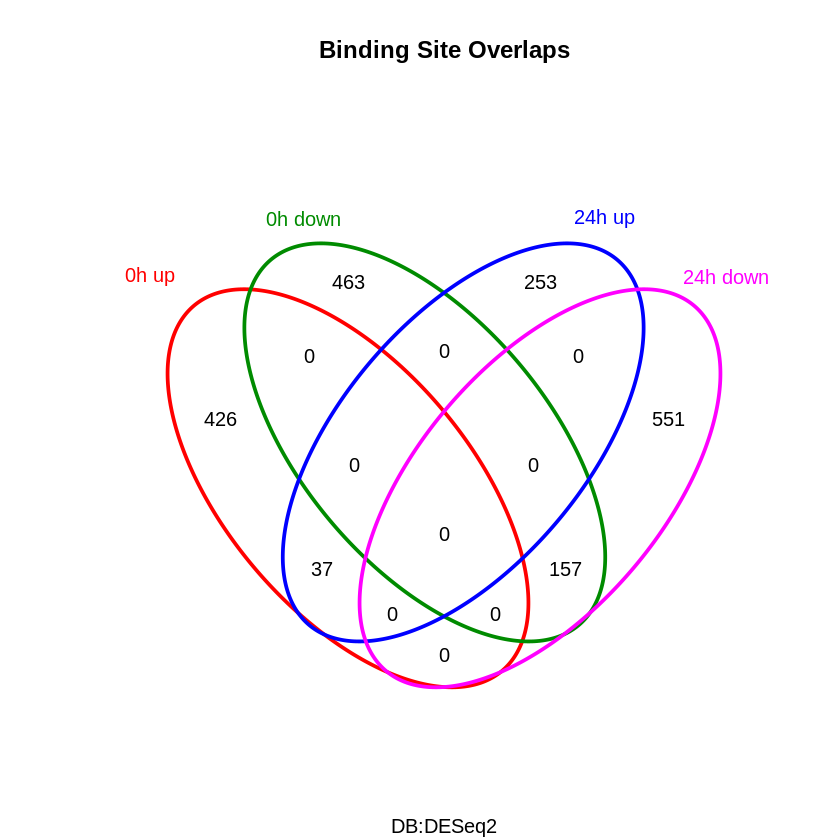

In [41]:
# Create a report containing the up/down regulated peaks of wt24h vs oe24h and wt0h vs oe0h
db_report <- dba.report(DBdata1, contrast=c(2,5), bDB=TRUE, bAll=FALSE, bGain=TRUE, bLoss=TRUE, bFlip=TRUE, bUsePval=T, th=0.05, fold=0)#, method = DBA_EDGER)
# print the report
db_report

# Plot a venn diagram using the peaks found in this report
important_peaks <- dba.plotVenn(db_report, mask=1:4, label1="0h up", label2="0h down", label3="24h up", label4="24h down")

In [42]:
# name all possible areas in the venn
names(important_peaks) <- c("0h_up", "0h down", "24h up", "24h down",
                            "0h_up 0h down", "0h up 24h up", "0h up 24h down",
                            "0h_down 24h up", "0h down 24h down",
                            "24h_up 24h down",
                            "not 0h up", "not 0h down", "not 24h up", "not 24h down", # In first draft i forgot to add this line.
                            "All")
# Add the number of peaks to the venn diagram areas
peakset_counts <- lapply(important_peaks, length)
names(important_peaks) <- paste(names(important_peaks), " (", peakset_counts, ")", sep="")

In [43]:
# Generate a profle plot using the areas found
profile_plot_data1 <- dba.plotProfile(DBdata1, 
                sites=important_peaks[sapply(important_peaks, length) > 5], # clusters smaller then 5 are hard to read and clutter the plot so i removed them.
                samples=list(WT0h=DBdata1$masks$WT_0h,
                             OE0h=DBdata1$masks$OE_0h,
                            WT24h=DBdata1$masks$WT_24h,
                            OE24h=DBdata1$masks$OE_24h)
                )

Generating profiles...



Plotting...



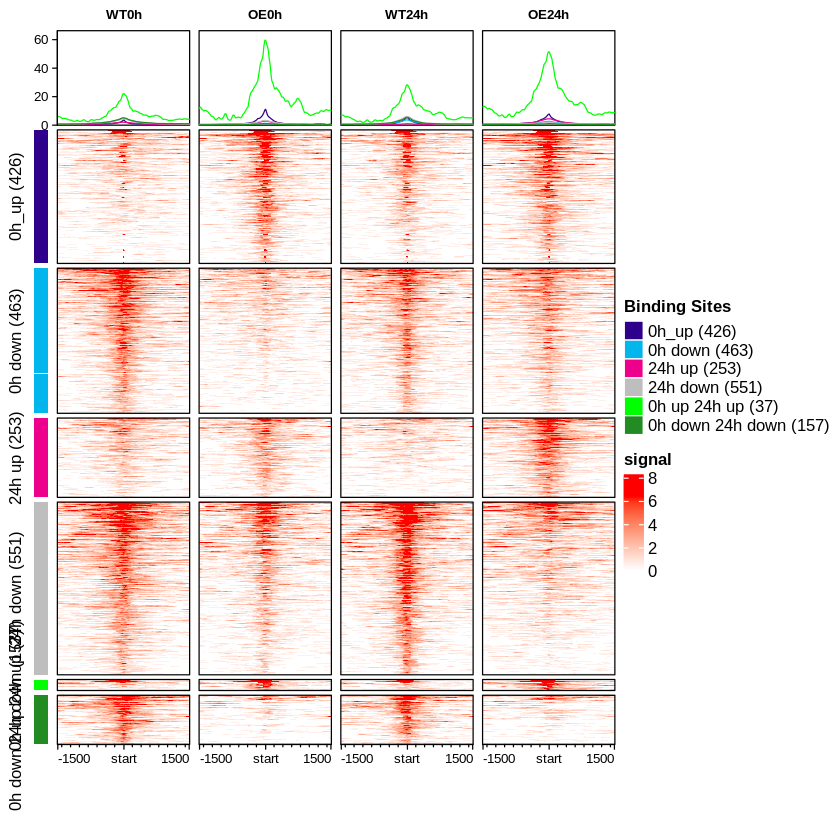

In [44]:
# plot the profile plot
dba.plotProfile(profile_plot_data1, matrices_color=list(c("white", "red"), 
                                                       c("white", "red"), 
                                                       c("white", "red"), 
                                                       c("white", "red"))
                #ylim=c(0,50),
               ,raster_quality=1)

## GO Enrichment

In [ ]:
# Get mouse gene names
annoDataTxDb <- toGRanges(TxDb.Mmusculus.UCSC.mm39.knownGene)

In [257]:

# Upregulated peaks in 0h
ann_up_0h <- db_report$peaks[[1]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=T) %>% 
    annotatePeakInBatch(AnnotationData=annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
               feature_id_type="entrez_id",
               IDs2Add=c("entrez_id", "ensembl", "symbol"))

# Downregulated peaks in 0h
ann_down_0h <- db_report$peaks[[2]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=T) %>% 
    annotatePeakInBatch(AnnotationData=annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
               feature_id_type="entrez_id",
               IDs2Add=c("entrez_id", "ensembl", "symbol"))
# Upregulated peaks in 24h
ann_up_24h <- db_report$peaks[[3]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=T) %>% 
    annotatePeakInBatch(AnnotationData=annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
               feature_id_type="entrez_id",
               IDs2Add=c("entrez_id", "ensembl", "symbol"))
# Downregulated peaks in 24h
ann_down_24h <- db_report$peaks[[4]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=T) %>% 
    annotatePeakInBatch(AnnotationData=annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
               feature_id_type="entrez_id",
               IDs2Add=c("entrez_id", "ensembl", "symbol"))


In [275]:
ontology="ALL"

go_down_0h <- enrichGO(gene = mcols(ann_down_0h)$ensembl,
         OrgDb = "org.Mm.eg.db",
         keyType = "ENSEMBL",
         ont = ontology)

go_up_0h <- enrichGO(gene = mcols(ann_up_0h)$ensembl,
         OrgDb = "org.Mm.eg.db",
         keyType = "ENSEMBL",
         ont = ontology)

go_down_24h <- enrichGO(gene = mcols(ann_down_24h)$ensembl,
         OrgDb = "org.Mm.eg.db",
         keyType = "ENSEMBL",
         ont = ontology)

go_up_24h <- enrichGO(gene = mcols(ann_up_24h)$ensembl,
         OrgDb = "org.Mm.eg.db",
         keyType = "ENSEMBL",
         ont = ontology)

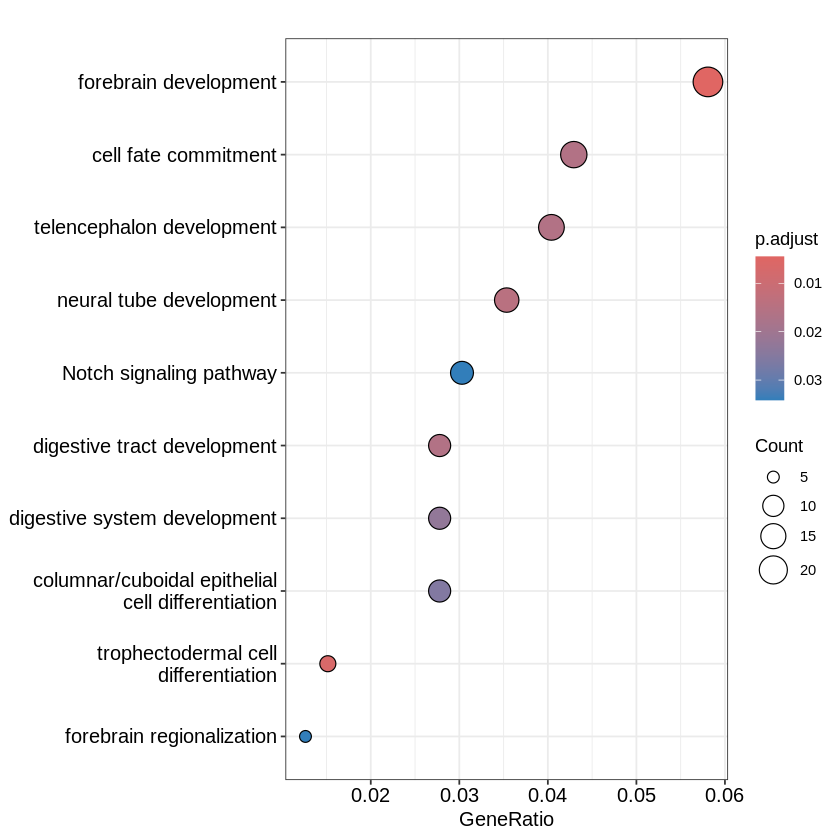

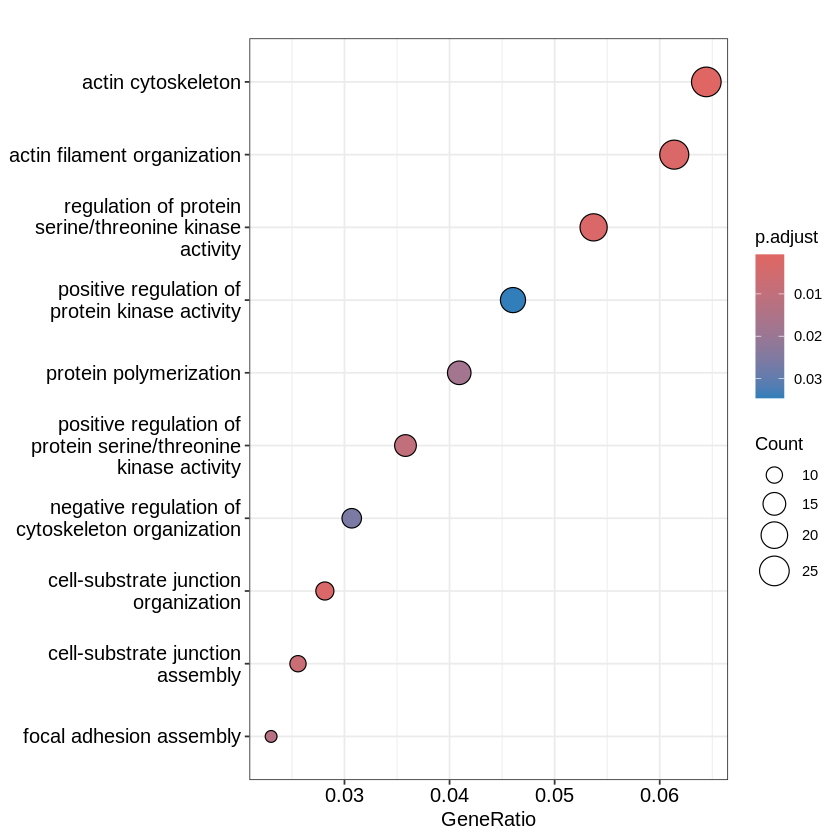

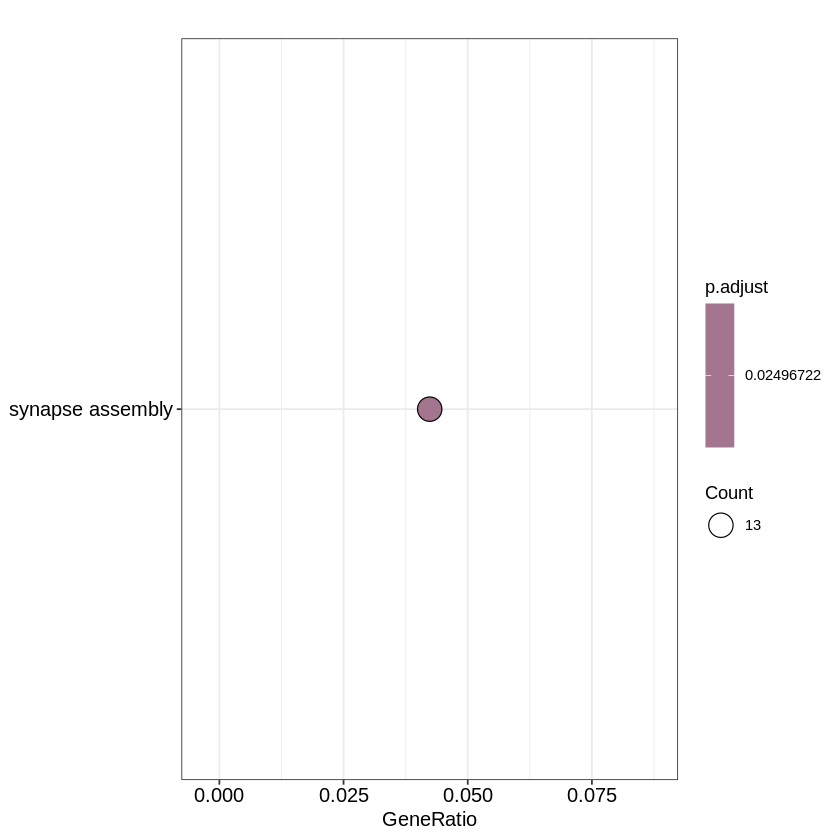

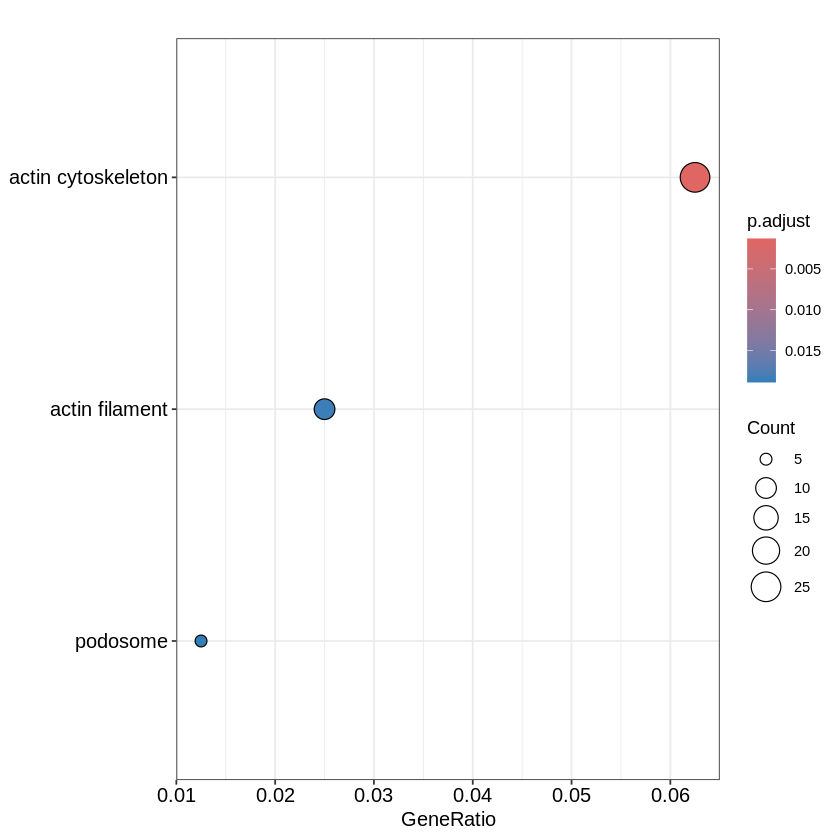

In [276]:
# Plot the results
dotplot(go_up_0h)
dotplot(go_down_0h)
dotplot(go_up_24h)
dotplot(go_down_24h)

## Test padj/fold cutoffs

In [114]:
create_profile_plot <- function(diff_exp_data, fdr_cutoff, fold_cutoff, contrast1=2, contrast2=5, merge_val=DBA_REPLICATE, norm=TRUE) {
    # get differentially expressed peaks
    diff_bind_report <- dba.report(diff_exp_data, 
                                   contrast=c(contrast1,contrast2),
                                   bDB=TRUE, 
                                   bAll=FALSE, 
                                   bGain=TRUE, 
                                   bLoss=TRUE, 
                                   bFlip=TRUE, 
                                   fold=fold_cutoff, 
                                   th=fdr_cutoff, 
                                   bCounts=TRUE, 
                                   bNormalized=TRUE,
                                   bUsePval=TRUE)
    print(diff_bind_report)
    # Get the overlap in differential peaks
    peaks_to_plot <- dba.plotVenn(diff_bind_report, mask=1:length(diff_bind_report$peaks) )# , label1="0h up", label2="0h down", label3="24h up", label4="24h down")

    # Get profile plot information
    profile_plot_data1 <- dba.plotProfile(diff_exp_data, 
                sites=peaks_to_plot[sapply(peaks_to_plot, length) > 5], # clusters smaller then 5 are hard to read and clutter the plot so i removed them.
                samples=list(WT0h=diff_exp_data$masks$WT_0h,
                             OE0h=diff_exp_data$masks$OE_0h,
                            WT24h=diff_exp_data$masks$WT_24h,
                            OE24h=diff_exp_data$masks$OE_24h),
                normalize=norm,
                merge=merge_val
                ) #merge=NULL

    return(list(profile_plot_data1, diff_bind_report, peaks_to_plot))
}

Generating report-based DBA object...



4 Samples, 524 sites in matrix:
           Contrast Direction DB Method Intervals
1   OE_0h vs. WT_0h      Gain DB DESeq2       131
2   OE_0h vs. WT_0h      Loss DB DESeq2        49
3 OE_24h vs. WT_24h      Gain DB DESeq2       105
4 OE_24h vs. WT_24h      Loss DB DESeq2       317


Generating profiles...

Plotting...



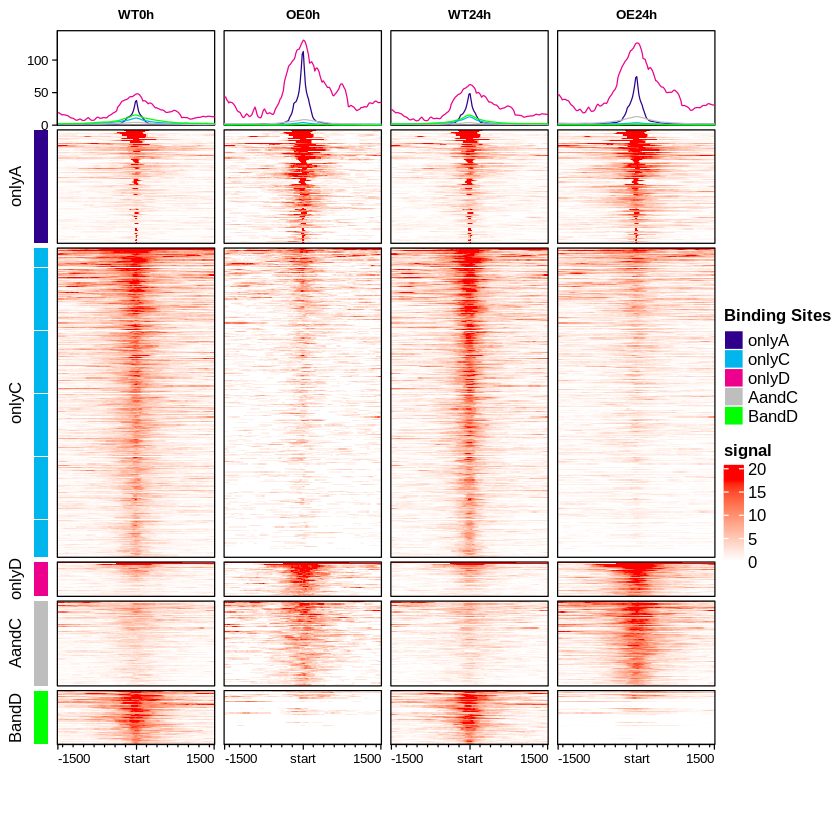

In [98]:
# Try different cut-offs
fdr_cut=0.1
fold_cut=0.1
profile_plots_no_fdr <- create_profile_plot(diff_exp_data=DBdata2, fdr_cutoff=fdr_cut, fold_cutoff=fold_cut, contrast1=2, contrast2=5, norm=TRUE)

dba.plotProfile(profile_plots_no_fdr[[1]], raster_quality=1, matrices_color=list(c("white", "red"), c("white", "red"), c("white", "red"), c("white", "red")))

## Diffbind peaks | deseq analysis

In [95]:
# extract the raw counts
myDBA <- dba.count(DBdata, peaks=NULL, score=DBA_SCORE_READS)
raw_counts <- dba.peakset(myDBA, bRetrieve=TRUE, DataType=DBA_DATA_FRAME) %>% rownames_to_column("names")
raw_counts <- unite(raw_counts, index, c(1:4), sep = "~")
row.names(raw_counts) <- raw_counts$index
raw_counts <- raw_counts[-1]

# Get required deseq parameters for the 24 hour comparison
conditions <- factor(c("WT_0h", "WT_0h", 
                       "WT_24h", "WT_24h", 
                       "WT_48h", "OE_0h",
                       "OE_0h", "OE_24h",
                       "OE_24h", "OE_48h")) %>% relevel(ref="WT_24h")

coldata <- data.frame(row.names = colnames(raw_counts), conditions)
dds_raw_24 <- DESeqDataSetFromMatrix(countData=round(raw_counts), colData=coldata, design= ~conditions)

# Perform deseq2 analysis
deseq_analysis_raw_24 <- DESeq(dds_raw_24, betaPrior=FALSE)
deseq_result_raw_no_shrink_24 <- results(deseq_analysis_raw_24 , contrast=c("conditions", "OE_24h", "WT_24h"))

deseq_result_raw_shrink_24 <- DESeq2::lfcShrink(deseq_analysis_raw_24, coef="conditions_OE_24h_vs_WT_24h", res=deseq_result_raw_no_shrink_24)


# Get required deseq parameters for the 0 hour comparison
conditions <- factor(c("WT_0h", "WT_0h", 
                       "WT_24h", "WT_24h", 
                       "WT_48h", "OE_0h",
                       "OE_0h", "OE_24h",
                       "OE_24h", "OE_48h")) %>% relevel(ref="WT_0h")

coldata <- data.frame(row.names = colnames(raw_counts), conditions)
dds_raw_0 <- DESeqDataSetFromMatrix(countData=round(raw_counts), colData=coldata, design= ~conditions)

# Perform deseq2 analysis
deseq_analysis_raw_0 <- DESeq(dds_raw_0, betaPrior=FALSE)
deseq_result_raw_no_shrink_0 <- results(deseq_analysis_raw_0 , contrast=c("conditions", "OE_0h", "WT_0h"))

deseq_result_raw_shrink_0 <- DESeq2::lfcShrink(deseq_analysis_raw_0, coef="conditions_OE_0h_vs_WT_0h", res=deseq_result_raw_no_shrink_0)

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



## Visualise genes found using deseq2

In [ ]:
# Set cut-offs
padj_cutt <- 0.05
lfc_cutt <- 0
deseq_analysis_24 <- deseq_result_raw_shrink_24
deseq_analysis_0 <- deseq_result_raw_shrink_0

# Extract the required genes
up_24 <- results(deseq_analysis_24, contrast=c("conditions", "OE_24h", "WT_24h"), lfcThreshold=lfc_cutt, alpha=padj_cutt) %>% 
    na.omit() %>% 
    {.[.$padj <= padj_cutt & .$log2FoldChange >= lfc_cutt,]} %>%
    rownames() %>%
    str_split("~", simplify=TRUE) %>%
    data.frame() %>%
    column_to_rownames("X1")

down_24 <- results(deseq_analysis_24, contrast=c("conditions", "OE_24h", "WT_24h"), lfcThreshold=lfc_cutt, alpha=padj_cutt) %>% 
    na.omit() %>% 
    {.[.$padj <= padj_cutt & .$log2FoldChange <= -lfc_cutt,]} %>%
    rownames() %>%
    str_split("~", simplify=TRUE) %>%
    data.frame() %>%
    column_to_rownames("X1")

up_0 <- results(deseq_analysis_0, contrast=c("conditions", "OE_0h", "WT_0h"), lfcThreshold=lfc_cutt, alpha=padj_cutt) %>% 
    na.omit() %>% 
    {.[.$padj <= padj_cutt & .$log2FoldChange >= lfc_cutt,]} %>%
    rownames() %>%
    str_split("~", simplify=TRUE) %>%
    data.frame() %>%
    column_to_rownames("X1")

down_0 <- results(deseq_analysis_0, contrast=c("conditions", "OE_0h", "WT_0h"), lfcThreshold=lfc_cutt, alpha=padj_cutt) %>% 
    na.omit() %>% 
    {.[.$padj <= padj_cutt & .$log2FoldChange <= -lfc_cutt,]} %>%
    rownames() %>%
    str_split("~", simplify=TRUE) %>%
    data.frame() %>%
    column_to_rownames("X1")

nrow(up_0)
nrow(up_24)
nrow(down_0)
nrow(down_24)

In [ ]:
# Combine different dataframes for all combinations. For example the intersect between up at 24 hours and up at 0 hours.
up_0_and_24 <- inner_join(up_0, up_24, by=c("X2", "X3", "X4"))
down_0_and_24 <- inner_join(down_0, down_24, by=c("X2", "X3", "X4"))

up_only_0 <- anti_join(up_0, up_0_and_24, by=c("X2", "X3", "X4")) %>% makeGRangesFromDataFrame(seqnames.field="X2", start.field="X3", end.field="X4")
up_only_24 <- anti_join(up_24, up_0_and_24, by=c("X2", "X3", "X4")) %>% makeGRangesFromDataFrame(seqnames.field="X2", start.field="X3", end.field="X4")
down_only_24 <- anti_join(down_24, down_0_and_24, by=c("X2", "X3", "X4")) %>% makeGRangesFromDataFrame(seqnames.field="X2", start.field="X3", end.field="X4")

up_0_and_24 <- up_0_and_24 %>% makeGRangesFromDataFrame(seqnames.field="X2", start.field="X3", end.field="X4")
down_0_and_24 <- down_0_and_24 %>% makeGRangesFromDataFrame(seqnames.field="X2", start.field="X3", end.field="X4")

In [ ]:
# Change the format so it can be plotted
peaksets_to_plot <- GRangesList("down_only_24"=down_only_24, "up_only_24"=up_only_24, "up_0_and_24"=up_0_and_24, "down_0_and_24"=down_0_and_24, "up_only_0"=up_only_0)

Generating profiles...

Plotting...



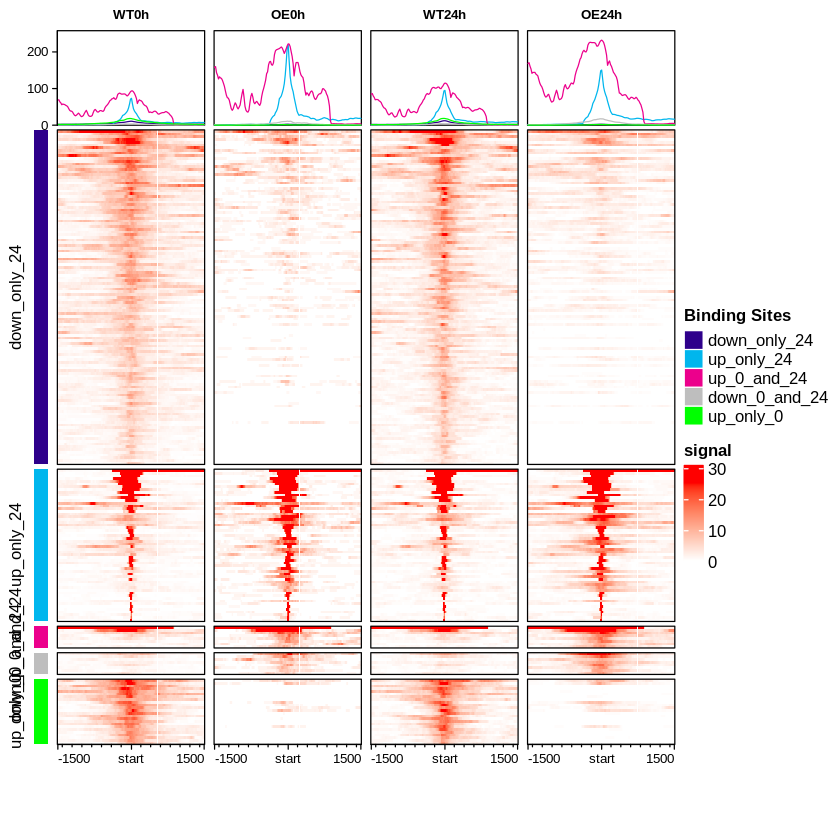

In [ ]:
# Plot the analysis
profile_plot <- dba.plotProfile(DBdata2, 
    sites=peaksets_to_plot, # clusters smaller then 5 are hard to read and clutter the plot so i removed them.
    samples=list(WT0h=DBdata2$masks$WT_0h,
    OE0h=DBdata2$masks$OE_0h,
    WT24h=DBdata2$masks$WT_24h,
    OE24h=DBdata2$masks$OE_24h)
)

dba.plotProfile(profile_plot, raster_quality=1, matrices_color=list(c("white", "red"), c("white", "red"), c("white", "red"), c("white", "red")))

Plotting...



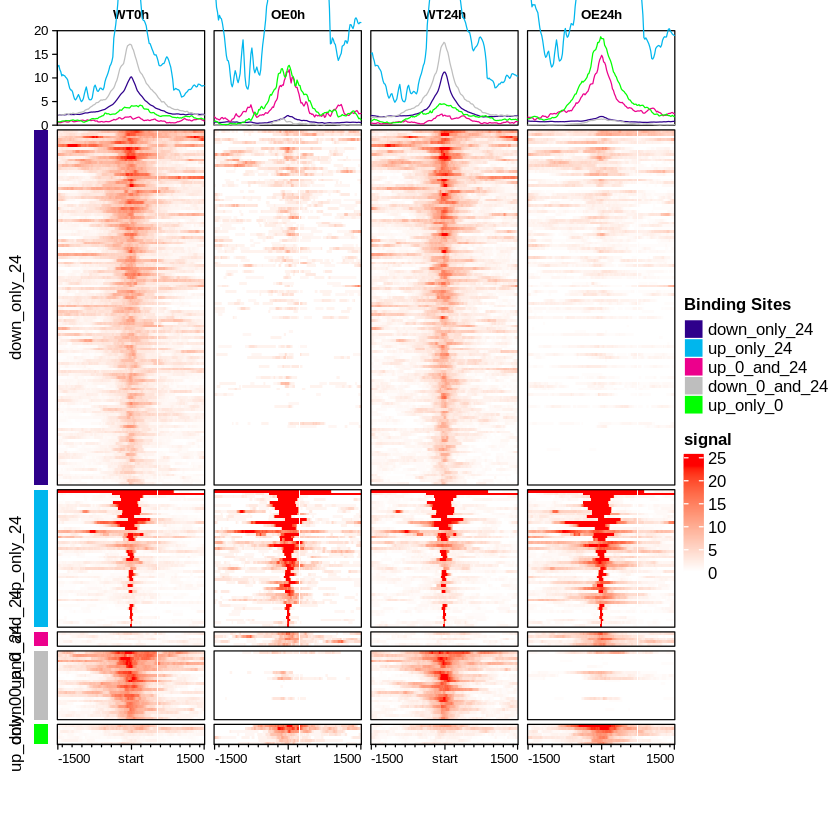

In [ ]:
# Use a different scale on the y-axis
dba.plotProfile(profile_plot, ylim=c(0,20), raster_quality=1, matrices_color=list(c("white", "red"), c("white", "red"), c("white", "red"), c("white", "red")))

## S2S peaks | Diffbind analysis

In [8]:
# Get the s2s peaks
pre_normalised_counts <- read.delim("/scratch/lmaas/mda5_project/seq2science_no_length_filter/counts/macs2/GRCm39_raw_technical_reps.tsv", 
                                    sep="\t", 
                                    comment = "#", 
                                    row.names="loc")

In [10]:
# Change the format so it can be used in diffbind
countGrange <- pre_normalised_counts %>% 
    rownames_to_column("location") %>% 
    separate("location", c("chr", "loc"), sep=":") %>%
    separate("loc", c("start", "end"), sep="-") %>%
    makeGRangesFromDataFrame(keep.extra.columns=TRUE)

countMatrix <- mcols(countGrange)
names(countMatrix) <- c('WT0h_1','WT0h_2','WT24h_1','WT24h_2','WT48h_1','OE0h_1','OE0h_2','OE24h_1','OE24h_2','OE48h_1')

newDBA <- NULL
for(sample in 1:ncol(countMatrix)) {
   newDBA <- dba.peakset(newDBA, peaks=countGrange, 
                         sampID=colnames(countMatrix)[sample],
                         counts=countMatrix[,sample])
}

In [14]:
WT_0h_mask <- c(WT0h_1=TRUE,WT0h_2=TRUE,WT24h_1=FALSE,WT24h_2=FALSE,WT48h_1=FALSE,OE0h_1=FALSE,OE0h_2=FALSE,OE24h_1=FALSE,OE24h_2=FALSE,OE48h_1=FALSE)
WT_24h_mask <- c(WT0h_1=FALSE,WT0h_2=FALSE,WT24h_1=TRUE,WT24h_2=TRUE,WT48h_1=FALSE,OE0h_1=FALSE,OE0h_2=FALSE,OE24h_1=FALSE,OE24h_2=FALSE,OE48h_1=FALSE)
OE_0h_mask <- c(WT0h_1=FALSE,WT0h_2=FALSE,WT24h_1=FALSE,WT24h_2=FALSE,WT48h_1=FALSE,OE0h_1=TRUE,OE0h_2=TRUE,OE24h_1=FALSE,OE24h_2=FALSE,OE48h_1=FALSE)
OE_24h_mask <- c(WT0h_1=FALSE,WT0h_2=FALSE,WT24h_1=FALSE,WT24h_2=FALSE,WT48h_1=FALSE,OE0h_1=FALSE,OE0h_2=FALSE,OE24h_1=TRUE,OE24h_2=TRUE,OE48h_1=FALSE)

newDBA$masks$WT_0h <- WT_0h_mask
newDBA$masks$WT_24h <- WT_24h_mask
newDBA$masks$OE_0h <- OE_0h_mask 
newDBA$masks$OE_24h <- OE_24h_mask

newDBA$class[c(1:7,9:13),] <- DBdata1$class[c(1:7,9:13),]
newDBA$meta <- DBdata$meta
colnames(newDBA$class) <- unname(newDBA$class[1,])

newDBA$config$design <- TRUE
newDBA <- dba.contrast(newDBA, categories=DBA_CONDITION, minMembers=2)

In [21]:
# Analyse the s2s data
newDBA <- dba.normalize(newDBA, library=DBA_LIBSIZE_FULL, normalize=DBA_NORM_RLE)
newDBA <- dba.analyze(newDBA, method=DBA_DESEQ2, bBlacklist=FALSE, bGreylist=FALSE)

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



Generating report-based DBA object...



4 Samples, 11480 sites in matrix:
           Contrast Direction DB Method Intervals
1   OE_0h vs. WT_0h      Gain DB DESeq2      5627
2   OE_0h vs. WT_0h      Loss DB DESeq2      4448
3 OE_24h vs. WT_24h      Gain DB DESeq2       809
4 OE_24h vs. WT_24h      Loss DB DESeq2      1538


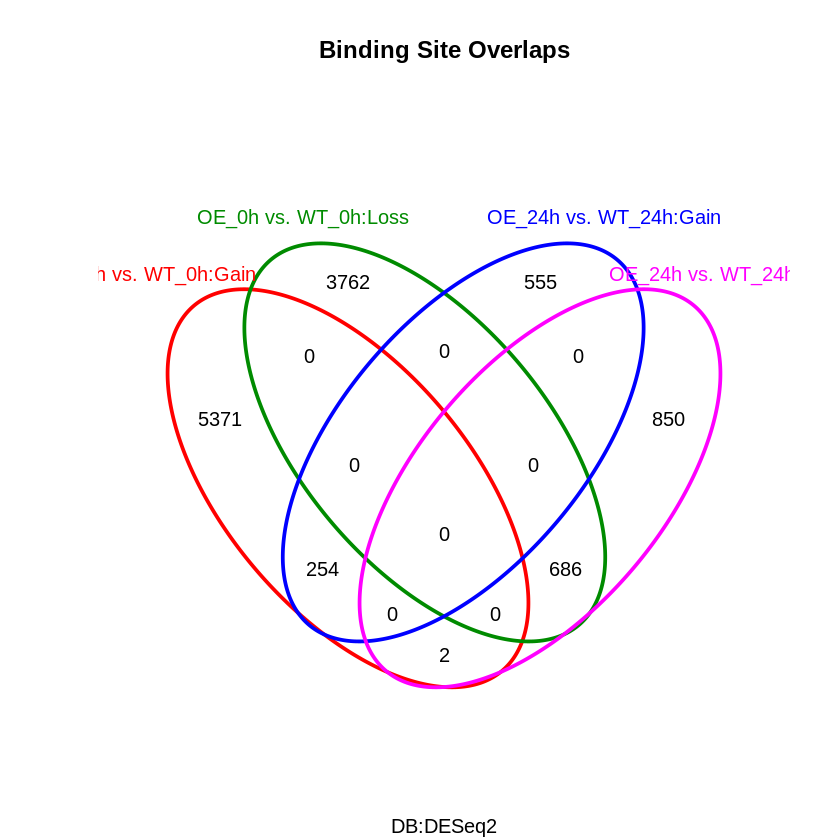

In [29]:
# Create a Venn diagrm of the results
diff_bind_report <- dba.report(newDBA, 
                                   contrast=c(2,5),
                                   bDB=TRUE, 
                                   bAll=FALSE, 
                                   bGain=TRUE, 
                                   bLoss=TRUE, 
                                   bFlip=TRUE, 
                                   fold=0.1, 
                                   th=0.05, 
                                   bCounts=TRUE, 
                                   bNormalized=TRUE,
                                   bUsePval=TRUE)
    print(diff_bind_report)
    # Get the overlap in differential peaks
    peaks_to_plot <- dba.plotVenn(diff_bind_report, mask=1:length(diff_bind_report$peaks) )# , label1="0h up", label2="0h down", label3="24h up", label4="24h down")


In [30]:
# Create a profile plot    
    profile_plot_data1 <- dba.plotProfile(newDBA, 
                sites=peaks_to_plot[sapply(peaks_to_plot, length) > 5], # clusters smaller then 5 are hard to read and clutter the plot so i removed them.
                samples=list(WT0h=newDBA$masks$WT_0h,
                             OE0h=newDBA$masks$OE_0h,
                            WT24h=newDBA$masks$WT_24h,
                            OE24h=newDBA$masks$OE_24h)
                )

Generating profiles...



Plotting...



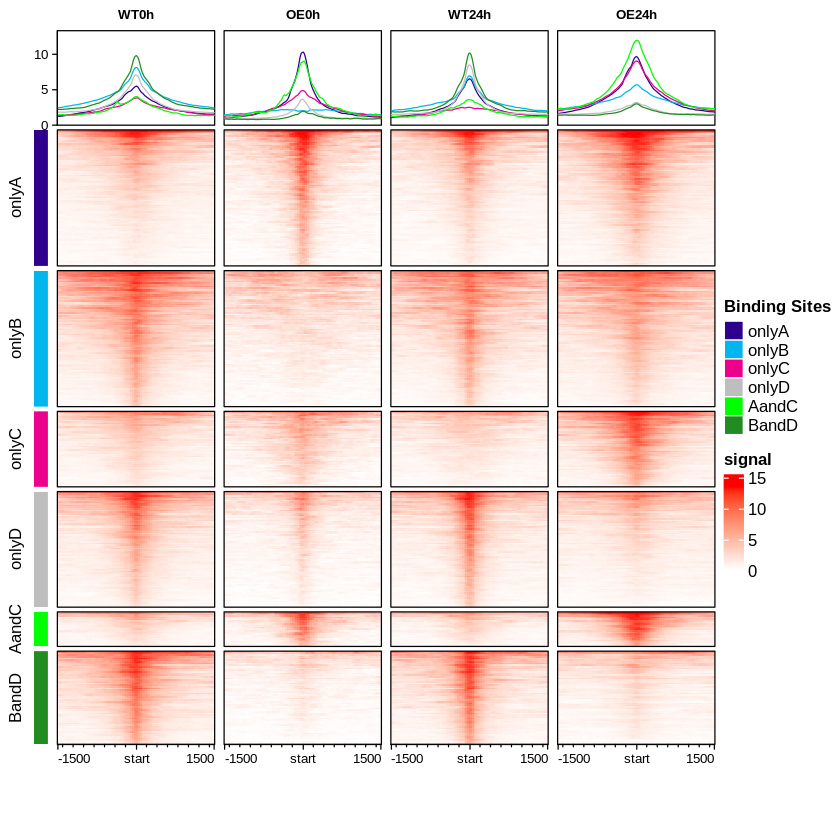

In [31]:
dba.plotProfile(profile_plot_data1, matrices_color=list(c("white", "red"), 
                                                       c("white", "red"), 
                                                       c("white", "red"), 
                                                       c("white", "red"))
                #ylim=c(0,50),
               ,raster_quality=1)

## Create HOMER input 

In [241]:
# Create a report
diff_bind_rep <- dba.report(DBdata2, 
                                   contrast=c(2,5),
                                   bDB=TRUE, 
                                   bAll=FALSE, 
                                   bGain=TRUE, 
                                   bLoss=TRUE, 
                                   bFlip=TRUE, 
                                   fold=0.1, 
                                   th=0.1, 
                                   bCounts=TRUE, 
                                   bNormalized=TRUE,
                                   bUsePval=TRUE)

Generating report-based DBA object...



In [249]:
# create input used by HOMER
gain_peaks_0 <- diff_bind_rep$peaks[[1]] %>%
    add_column(Strand=rep("+", nrow(.)), .after=4) %>%
    rownames_to_column(var="peakID") %>% 
    relocate(peakID, .after=End)

loss_peaks_0 <- diff_bind_rep$peaks[[2]] %>% 
    add_column(Strand=rep("+", nrow(.)), .after=4) %>%
    rownames_to_column(var="peakID") %>% 
    relocate(peakID, .after=End)

gain_peaks_24 <- diff_bind_rep$peaks[[3]] %>%
    add_column(Strand=rep("+", nrow(.)), .after=4) %>%
    rownames_to_column(var="peakID") %>% 
    relocate(peakID, .after=End)

loss_peaks_24 <- diff_bind_rep$peaks[[4]] %>% 
    add_column(Strand=rep("+", nrow(.)), .after=4) %>%
    rownames_to_column(var="peakID") %>% 
    relocate(peakID, .after=End)

# Save the HOMER input
write_tsv(gain_peaks_0, 
    "/scratch/lmaas/mda5_project/seq2science_no_length_filter/DE_analysis/Motif_analysis/pval_cutt/Upregulated_peaks_0.bed",
    col_names=FALSE)

write_tsv(loss_peaks_0, 
    "/scratch/lmaas/mda5_project/seq2science_no_length_filter/DE_analysis/Motif_analysis/pval_cutt/Downregulated_peaks_0.bed.bed",
    col_names=FALSE)

write_tsv(gain_peaks_24, 
    "/scratch/lmaas/mda5_project/seq2science_no_length_filter/DE_analysis/Motif_analysis/pval_cutt/Upregulated_peaks_24.bed",
    col_names=FALSE)

write_tsv(loss_peaks_24, 
    "/scratch/lmaas/mda5_project/seq2science_no_length_filter/DE_analysis/Motif_analysis/pval_cutt/Downregulated_peaks_24.bed",
    col_names=FALSE)

## Create a Pie chart of the different peak locations 

In [269]:
# Annotate the differental peaks at different time points. Also determine where the peaks are located
up_peaks_0 <- diff_bind_rep$peaks[[1]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=TRUE) %>% 
    annotatePeakInBatch(AnnotationData = annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
                       feature_id_type="entrez_id",
                       IDs2Add=c("ensemble_gene_id", "symbol")) %>%
    assignChromosomeRegion(overlaps, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Mmusculus.UCSC.mm39.knownGene)
    # {barplot(.$percentage, las=3)}


down_peaks_0 <- diff_bind_rep$peaks[[2]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=TRUE) %>% 
    annotatePeakInBatch(AnnotationData = annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
                       feature_id_type="entrez_id",
                       IDs2Add=c("ensemble_gene_id", "symbol")) %>%
    assignChromosomeRegion(overlaps, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Mmusculus.UCSC.mm39.knownGene)

up_peaks_24 <- diff_bind_rep$peaks[[3]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=TRUE) %>% 
    annotatePeakInBatch(AnnotationData = annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
                       feature_id_type="entrez_id",
                       IDs2Add=c("ensemble_gene_id", "symbol")) %>%
    assignChromosomeRegion(overlaps, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Mmusculus.UCSC.mm39.knownGene)

down_peaks_24 <- diff_bind_rep$peaks[[4]] %>% 
    makeGRangesFromDataFrame(keep.extra.columns=TRUE) %>% 
    annotatePeakInBatch(AnnotationData = annoDataTxDb) %>%
    addGeneIDs(orgAnn="org.Mm.eg.db",
                       feature_id_type="entrez_id",
                       IDs2Add=c("ensemble_gene_id", "symbol")) %>%
    assignChromosomeRegion(overlaps, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Mmusculus.UCSC.mm39.knownGene)

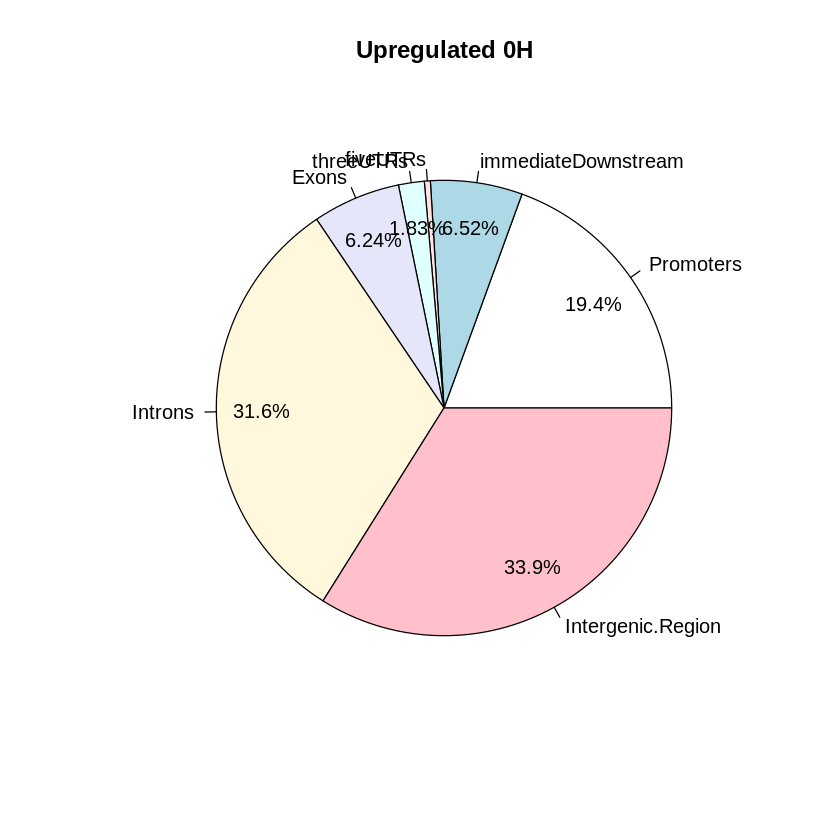

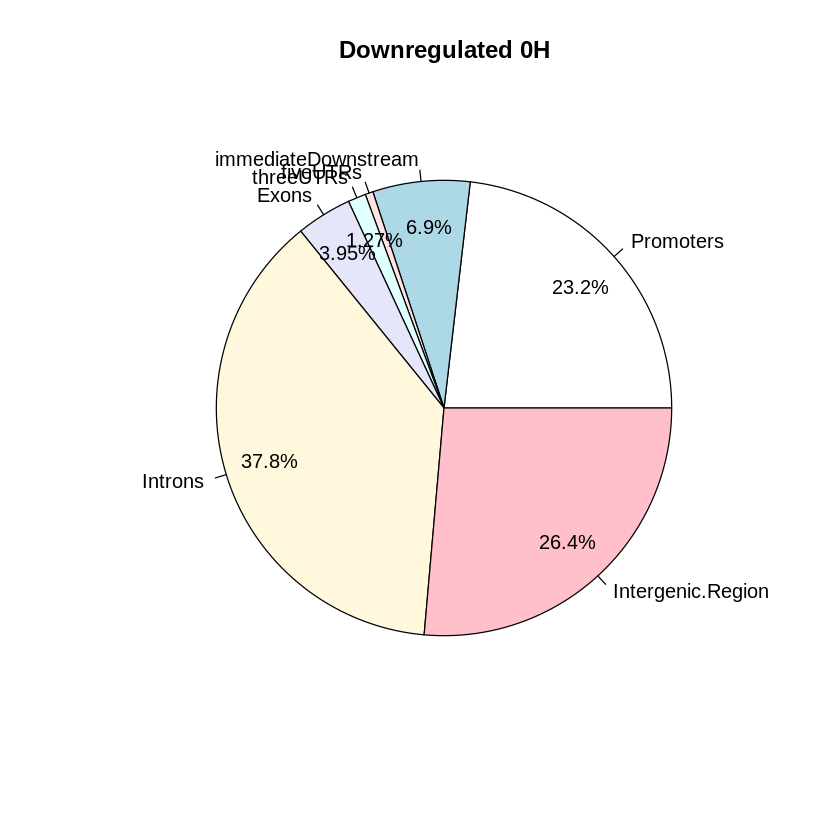

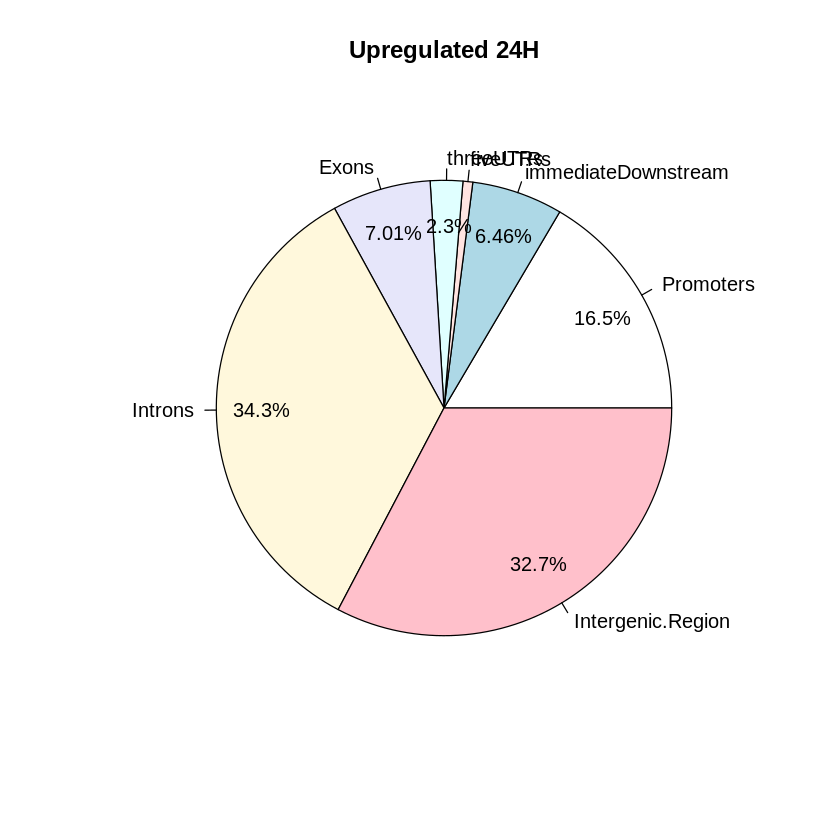

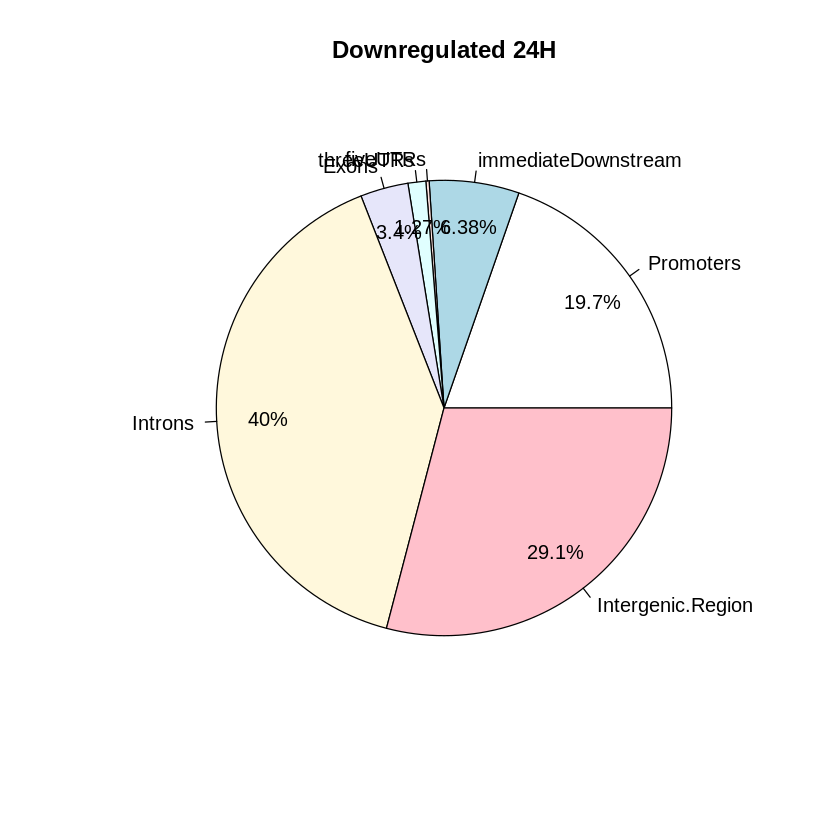

In [272]:
# Create a pie chrart with peak locations
up_peaks_0$percentage %>% pie1(main="Upregulated 0H")
down_peaks_0$percentage %>% pie1(main="Downregulated 0H")
up_peaks_24$percentage %>% pie1(main="Upregulated 24H")
down_peaks_24$percentage %>% pie1(main="Downregulated 24H")